In [138]:
import pandas as pd
import matplotlib.pyplot as plt

# Correcting the path usage in pd.read_csv
def process_data(data):
    df = pd.read_csv(data, delimiter=";")
    df['Pessimistic Time Complexity'] = df['Elapsed Time(s)'] / (df['Vertices(n)'] * df['Edges(m)'] * (df['Vertices(n)'] + df['Edges(m)']))
    df['Op Count Time Complexity'] = df['Elapsed Time(s)'] / ((df['r'] / 2 * (df['Vertices(n)'] * df['Edges(m)'])) * (df['s'] * df['Vertices(n)'] + df['t'] * df['Edges(m)']))
    df['Residual Time Complexity'] = df['Elapsed Time(s)'] / (df['BFS Calls(I)'] * (df['s'] * df['Vertices(n)'] + df['t'] * df['Edges(m)']))
    return df

data1="./graph_output.csv"
# data1 = "./graph1_output.csv"
# data2 = "./graph2_output.csv"
# data3 = "./graph3_output.csv"
#data4 = "./bipartite_graph_output.csv"
df1 = process_data(data1)
#df2 = process_data(data2)
#df3 = process_data(data3)
#df4 = process_data(data4)



   MAP  ARG1  ARG2  Max Capacity  Vertices(n)  Edges(m)  BFS Calls(I)  \
0    1     2     2           100            6         8             5   
1    1     2     2          1000            6         8             5   
2    1     2     2         10000            6         8             5   
3    1     2     2        100000            6         8             5   
4    1     2     4           100           10        16             9   

   Augment Calls  Max Flow  Elapsed Time(s)  ...  Std Dev BFS Operations    C  \
0              4       395         0.000016  ...                 1.16619  0.5   
1              4      4095         0.000012  ...                 1.16619  0.5   
2              4     36095         0.000012  ...                 1.16619  0.5   
3              4    336095         0.000011  ...                 1.16619  0.5   
4              8       238         0.000026  ...                 1.25708  0.5   

          r         s         t   uI  Pessimistic Time Complexity  \
0  0.

In [139]:
import matplotlib.pyplot as plt
import pandas as pd
from itertools import cycle, islice
from matplotlib.cm import get_cmap

def plot_columns_side_by_side_colored(df, y_col, filtered_arg3=100000):
    markers = ['o', 's', 'D', '^', 'v', '>', '<', 'p', '*', 'x']
    colormap = get_cmap('tab20')  # This colormap has 20 distinct colors
    colors = [colormap(i) for i in range(20)]  # Increase range for more colors if needed
    marker_cycle = cycle(markers)
    color_cycle = cycle(colors)
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))
    df = df.rename(columns={'ARG1': 'Number of Rows', 'ARG2': 'Number of Columns'})
    filtered_df = df[df['Max Capacity'] == filtered_arg3]
    x_columns = ['Number of Rows', 'Number of Columns']
    
    
    for i, ax in enumerate(axs):
    
        other_dim_index = 1 - i  # Get the index of the other dimension
        other_dim = x_columns[other_dim_index]
        unique_groups = sorted(filtered_df[other_dim].unique())

    
        unique_markers = list(islice(marker_cycle, len(unique_groups)))
        unique_colors = list(islice(color_cycle, len(unique_groups)))
        group_to_marker = dict(zip(unique_groups, unique_markers))
        group_to_color = dict(zip(unique_groups, unique_colors))

    
        for key, group in filtered_df.groupby(other_dim):
            ax.scatter(group[x_columns[i]], group[y_col], label=f'{key}',
                       marker=group_to_marker[key], color=group_to_color[key])

    
        ax.set_title(f'{x_columns[i]} vs {y_col}')
        ax.set_xlabel(x_columns[i])
        ax.set_ylabel(y_col)
        ax.grid(True)
        
        ax.legend(title=f"{other_dim.split()[-1]}", loc='upper left', bbox_to_anchor=(1,1))

    
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.autoscale(enable=True, axis='both', tight=None)
    plt.show()


In [140]:
import matplotlib.pyplot as plt
import pandas as pd
from itertools import cycle, islice
from matplotlib.cm import get_cmap


def plot_simple_graph(df, y_col, graph_title):
    #fig, ax = plt.subplots()
    fig = plt.figure()
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])  
    

    for label, grp in df.groupby('Max Capacity'):
        ax.plot(grp['Edges(m)'], grp[y_col], marker='o', linestyle='none', label=f'Capacity {label}')

    ax.set_xlabel('Edges (m)')
    ax.set_ylabel(y_col)  
    ax.set_title(graph_title)
    ax.legend(title='Max Capacity')
    plt.show()


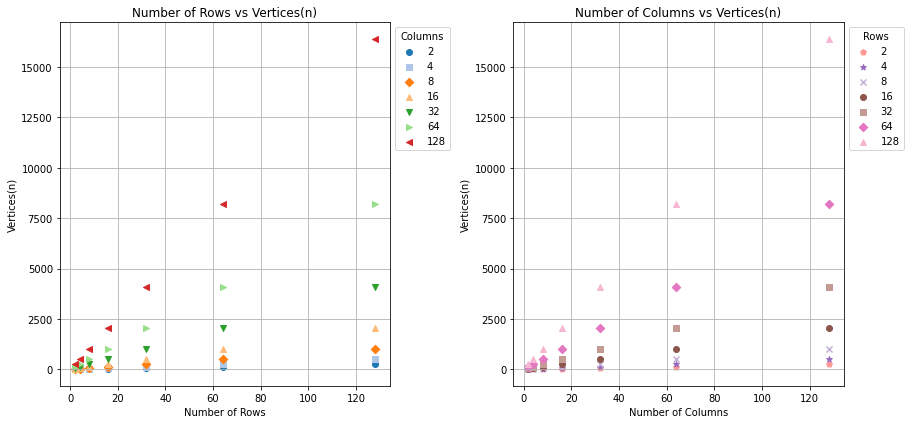

In [141]:
#plot_columns(df, 'Vertices', arg=0)
#plot_columns(df, 'Vertices', arg=1)
plot_columns_side_by_side_colored(df1, 'Vertices(n)')

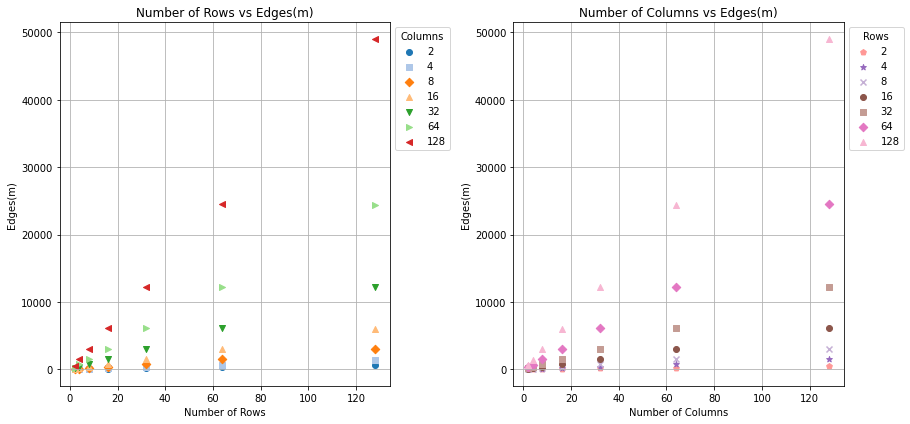

In [142]:
plot_columns_side_by_side_colored(df1, 'Edges(m)')

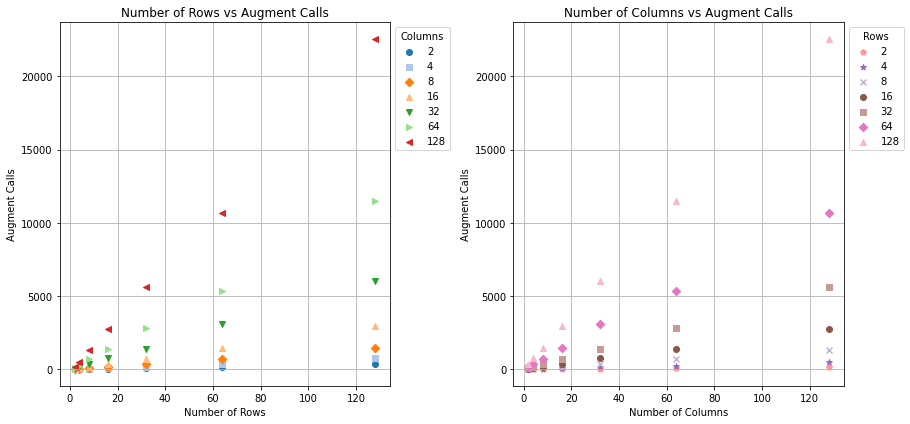

In [143]:
plot_columns_side_by_side_colored(df1, 'Augment Calls', filtered_arg3=10000)

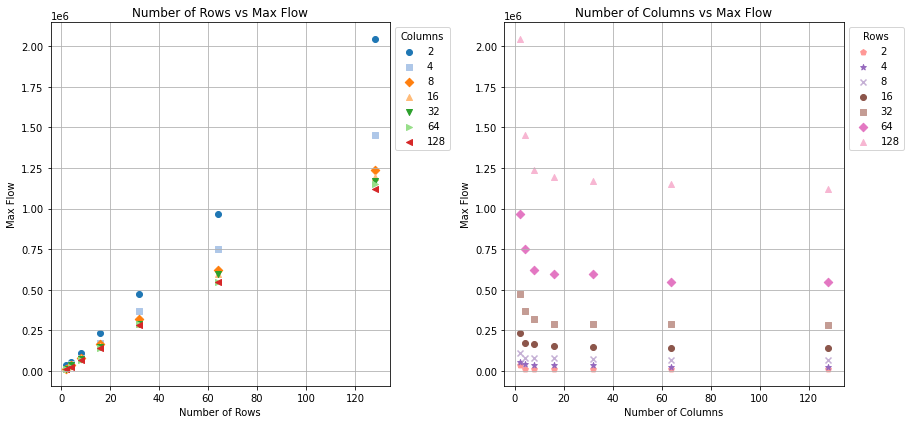

In [144]:
plot_columns_side_by_side_colored(df1, 'Max Flow', filtered_arg3=10000)

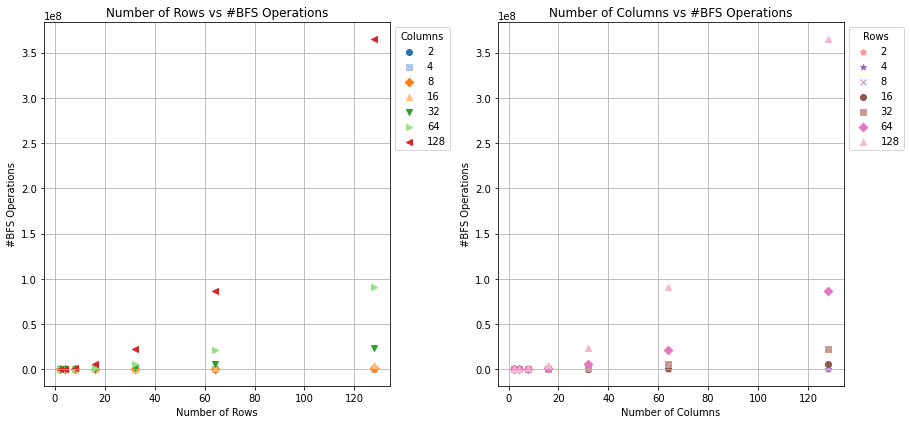

In [145]:
plot_columns_side_by_side_colored(df1, '#BFS Operations', filtered_arg3=10000)

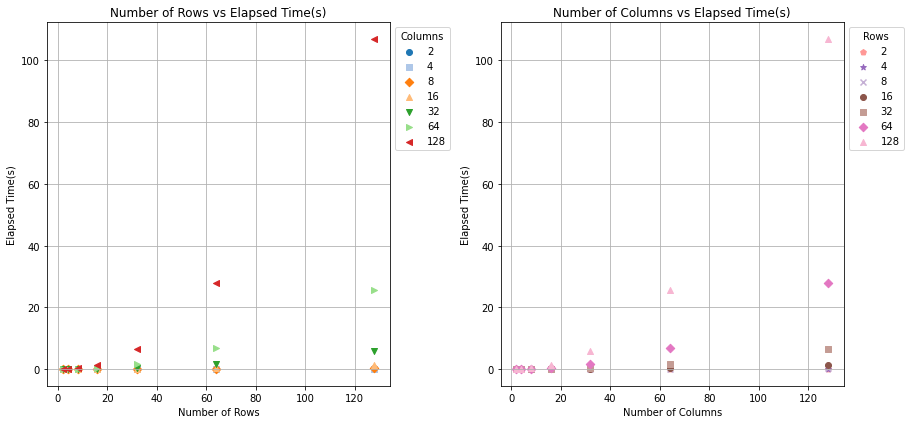

In [146]:
plot_columns_side_by_side_colored(df1, 'Elapsed Time(s)')

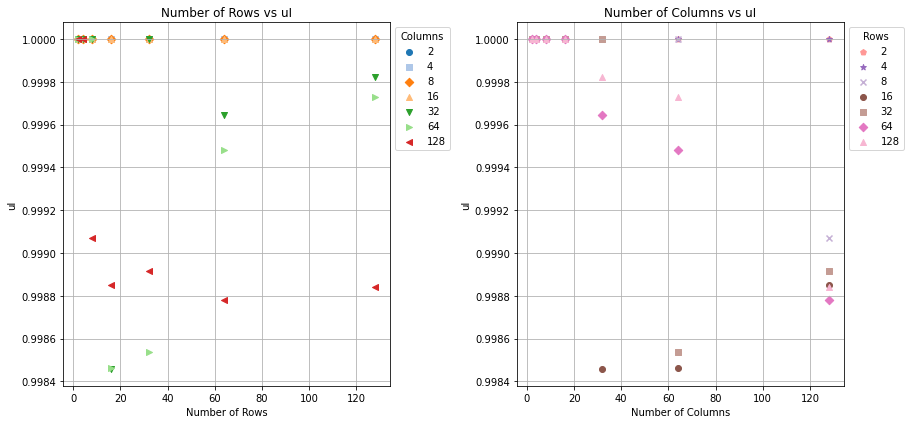

In [159]:
plot_columns_side_by_side_colored(df1, 'uI')

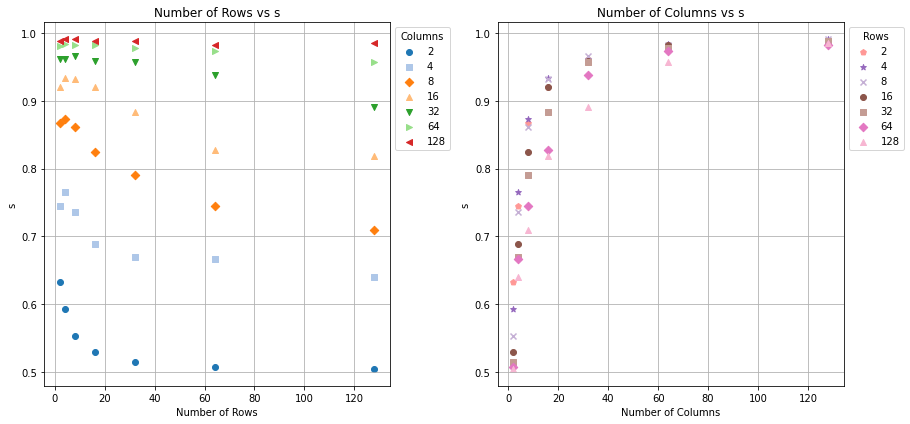

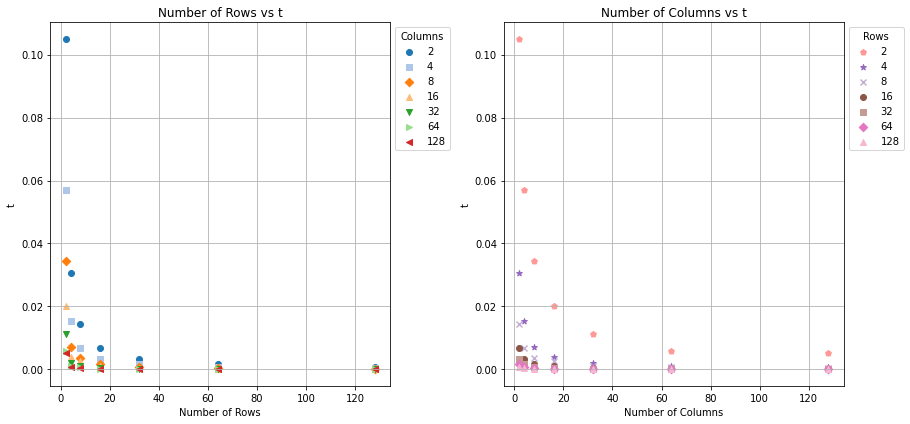

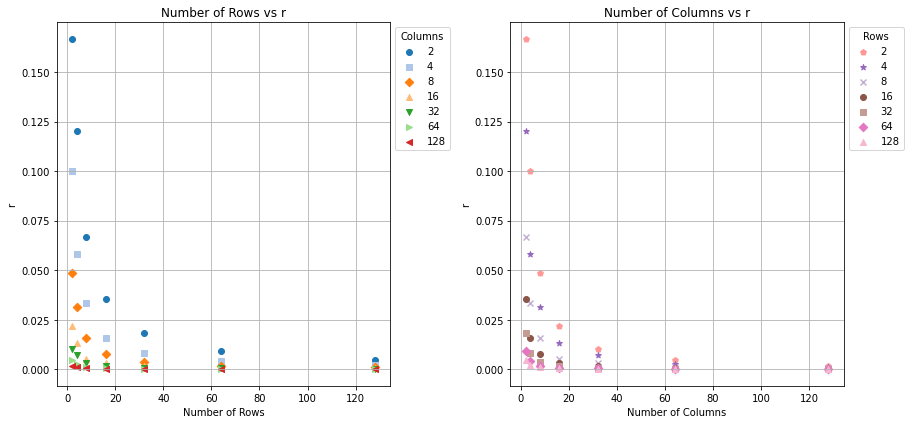

In [148]:
plot_columns_side_by_side_colored(df1, 's')
plot_columns_side_by_side_colored(df1, 't')
plot_columns_side_by_side_colored(df1, 'r')

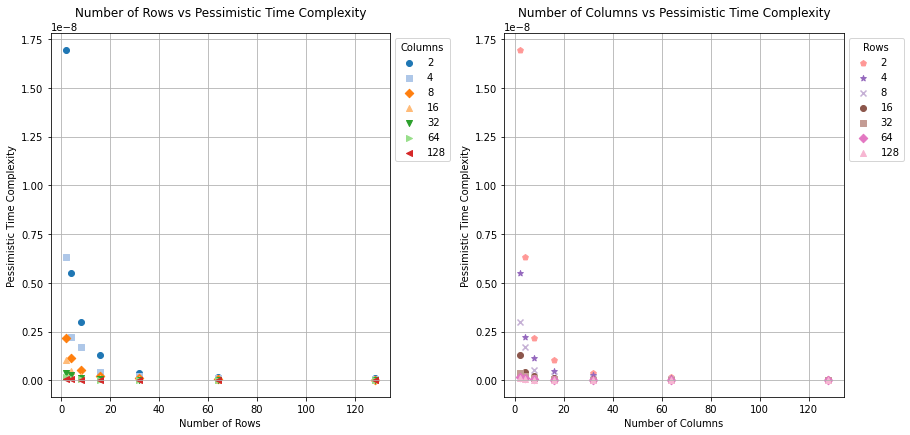

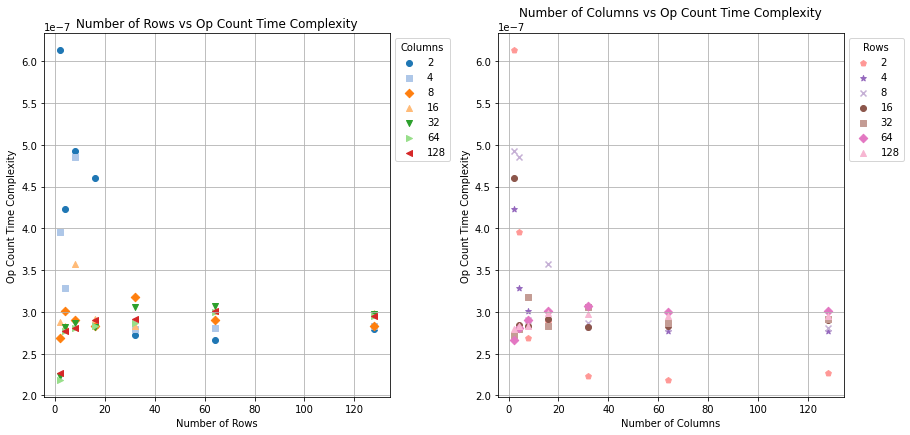

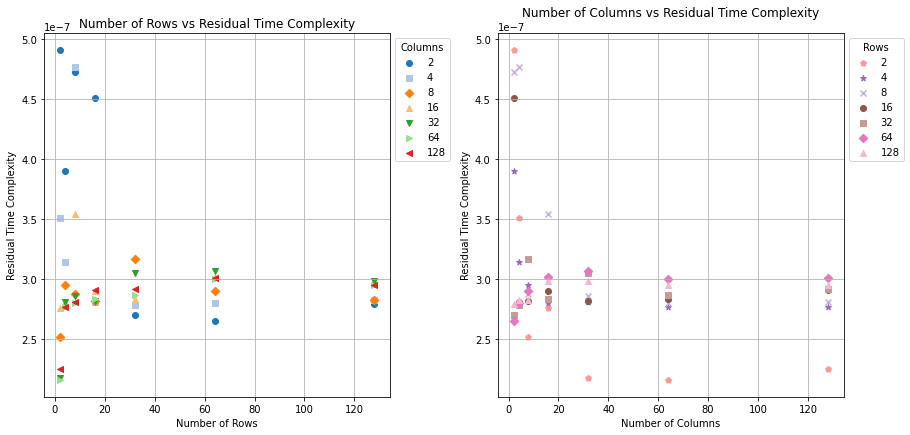

In [160]:
plot_columns_side_by_side_colored(df1, 'Pessimistic Time Complexity')
plot_columns_side_by_side_colored(df1, 'Op Count Time Complexity')
plot_columns_side_by_side_colored(df1, 'Residual Time Complexity')

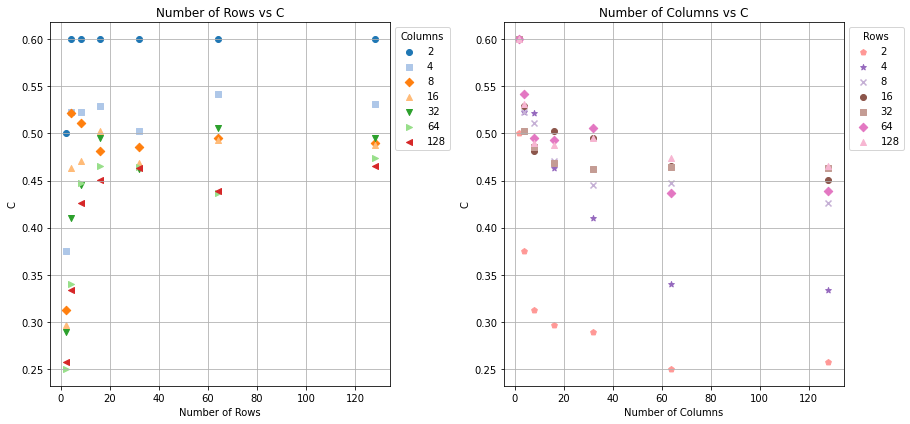

In [150]:
plot_columns_side_by_side_colored(df1, 'C', filtered_arg3=10000)

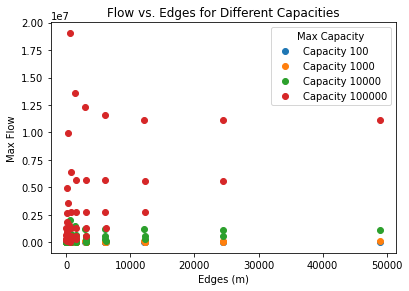

In [151]:

plot_simple_graph(df1, 'Max Flow', 'Flow vs. Edges for Different Capacities')


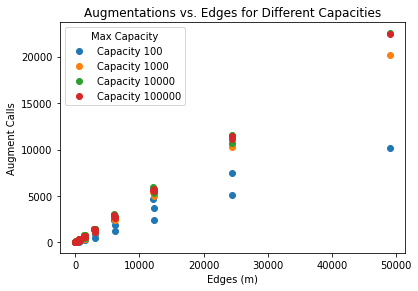

In [152]:
plot_simple_graph(df1, 'Augment Calls', 'Augmentations vs. Edges for Different Capacities')


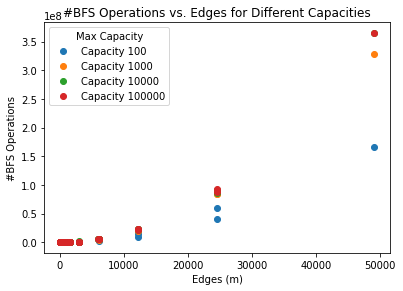

In [153]:
plot_simple_graph(df1, '#BFS Operations', '#BFS Operations vs. Edges for Different Capacities')


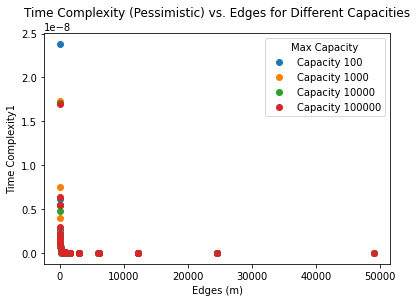

In [ ]:

plot_simple_graph(df1, 'Time Complexity1', 'Time Complexity (Pessimistic) vs. Edges for Different Capacities')

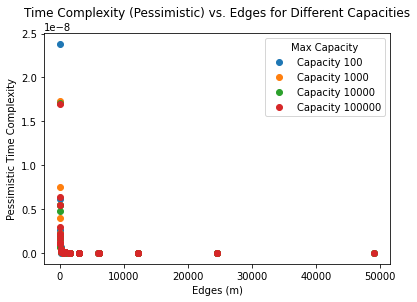

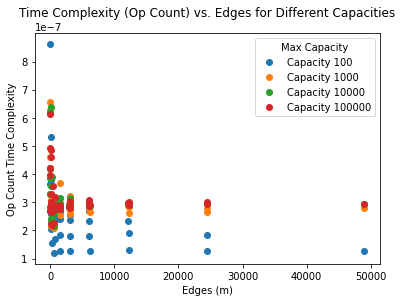

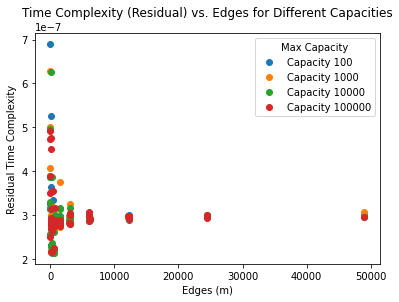

In [155]:
plot_simple_graph(df1, 'Pessimistic Time Complexity', 'Time Complexity (Pessimistic) vs. Edges for Different Capacities')
plot_simple_graph(df1, 'Op Count Time Complexity', 'Time Complexity (Op Count) vs. Edges for Different Capacities')
plot_simple_graph(df1, 'Residual Time Complexity', 'Time Complexity (Residual) vs. Edges for Different Capacities')

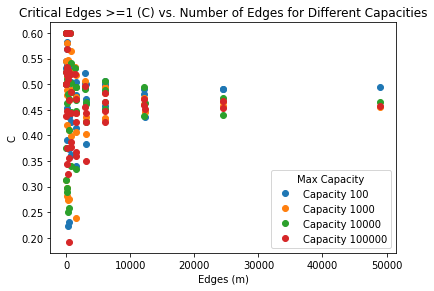

In [ ]:
plot_simple_graph(df1, 'C', 'Critical Edges >=1 (C) vs. Number of Edges for Different Capacities')

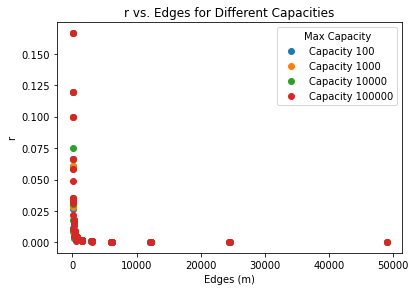

In [ ]:
plot_simple_graph(df1, 'r', 'r vs. Edges for Different Capacities')

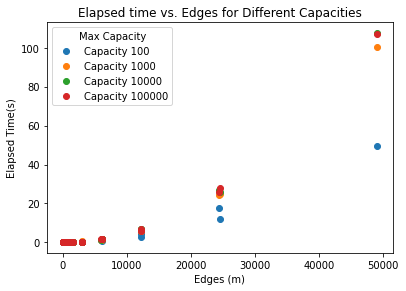

In [ ]:
plot_simple_graph(df1, 'Elapsed Time(s)', 'Elapsed time vs. Edges for Different Capacities')

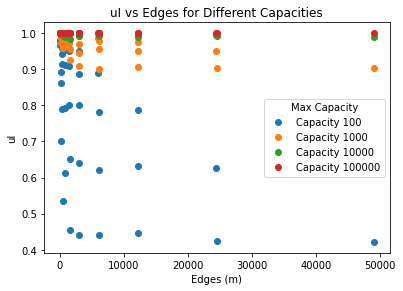

In [158]:
plot_simple_graph(df1, 'uI', 'uI vs Edges for Different Capacities')

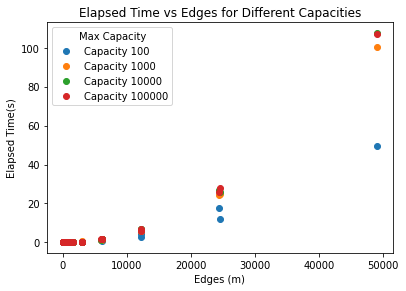

In [163]:
plot_simple_graph(df1, 'Elapsed Time(s)', 'Elapsed Time vs Edges for Different Capacities')